# Importing Libraries

In [2]:
from PAS_Learn.Classifier import GaussianNaiveBayes
from PAS_Learn.model_selection import My_train_test_split
from PAS_Learn.metrics import Evaluate

import pandas as pd


# Reading Data

In [3]:
df = pd.read_csv('M1_data.csv')
df.head()

,trust_apple,interest_computers,age_computer,user_pcmac,appleproducts_count,familiarity_m1,f_batterylife,f_price,f_size,f_multitasking,...,f_neural,f_synergy,f_performanceloss,m1_consideration,m1_purchase,gender,age_group,income_group,status,domain
0,No,4,8,PC,0,No,5,4,3,4,...,2,1,1,1,Yes,Male,2,2,Student,Science
1,Yes,2,4,PC,1,No,5,5,5,3,...,2,2,4,2,No,Male,2,3,Employed,Finance
2,Yes,5,6,PC,0,No,3,4,2,4,...,2,2,2,4,Yes,Male,2,2,Student,IT & Technology
3,Yes,2,6,Apple,4,No,4,3,3,4,...,4,4,3,2,No,Female,2,2,Student,Arts & Culture
4,Yes,4,4,Apple,7,Yes,5,3,3,4,...,3,4,4,4,Yes,Male,5,7,Employed,Hospitality


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   trust_apple          133 non-null    object
 1   interest_computers   133 non-null    int64 
 2   age_computer         133 non-null    int64 
 3   user_pcmac           133 non-null    object
 4   appleproducts_count  133 non-null    int64 
 5   familiarity_m1       133 non-null    object
 6   f_batterylife        133 non-null    int64 
 7   f_price              133 non-null    int64 
 8   f_size               133 non-null    int64 
 9   f_multitasking       133 non-null    int64 
 10  f_noise              133 non-null    int64 
 11  f_performance        133 non-null    int64 
 12  f_neural             133 non-null    int64 
 13  f_synergy            133 non-null    int64 
 14  f_performanceloss    133 non-null    int64 
 15  m1_consideration     133 non-null    int64 
 16  m1_purch

# Spliting to Features and Label

In [5]:
X, y = df.drop('trust_apple',axis=1), df['trust_apple']

# Encoding the Data

In [6]:
'''
user_pcmac ['PC' 'Apple' 'Hp' 'Other']
familiarity_m1 ['No' 'Yes']
m1_purchase ['Yes' 'No']
gender ['Male' 'Female']
status ['Student' 'Employed' 'Retired' 'Student ant employed' 'Unemployed' 'Self-Employed']
domain ['Science' 'Finance' 'IT & Technology' 'Arts & Culture' 'Hospitality' 'Politics' 'Social Sciences' 'Administration & Public Services' 
'Education' 'Engineering' 'Marketing' 'Healthcare' 'Business' 'Retired' 'Economics' 'Law' 'Agriculture' 'Communication ' 'Realestate' 
'Logistics' 'Consulting ' 'Retail']
 '''
y = y.map({'No': 0, 'Yes': 1})

X['user_pcmac'] = X['user_pcmac'].map({'PC': 0, 'Apple': 1, 'Hp': 3, 'Other': 4})

X['familiarity_m1'] = X['familiarity_m1'].map({'No': 0, 'Yes': 1})

X['m1_purchase'] = X['m1_purchase'].map({'Yes': 1, 'No': 0})

X['gender'] = X['gender'].map({'Male': 0, 'Female': 1})

X['status'] = X['status'].map({'Student': 0, 'Employed': 1, 'Retired': 2, 'Student ant employed': 3, 'Unemployed': 4, 'Self-Employed': 5})

X['domain'] = X['domain'].map({'Science': 0, 'Finance': 1, 'IT & Technology': 2, 'Arts & Culture': 3, 'Hospitality': 4,
                               'Politics': 5, 'Social Sciences': 6, 'Administration & Public Services': 7,'Education': 8, 
                               'Engineering': 9, 'Marketing': 10, 'Healthcare': 11, 'Business': 12, 'Retired': 13, 'Economics': 14, 
                               'Law': 15, 'Agriculture': 16, 'Communication ': 17, 'Realestate': 18, 'Logistics': 19, 'Consulting ': 20, 'Retail': 21})


# Spliting to train and test datasets

In [7]:
X_train, X_test, y_train, y_test = My_train_test_split(X, y, test_size=0.2, random_state=42)


# Training the model

In [8]:
AI_Model = GaussianNaiveBayes()
AI_Model.fit(X_train, y_train)
y_pred = AI_Model.predict(X_test)


# Final Evaluation

In [9]:
Evaluate(y_test, y_pred, ['Yes', 'No'])

Accuracy: 73.08%
Precision: 80.95%
Recall: 85.00%
F1 Score: 82.93%
Confusion Matrix:
+-----+-------+------+
|     |   Yes |   No |
+=====+=======+======+
| Yes |    17 |    4 |
+-----+-------+------+
| No  |     3 |    2 |
+-----+-------+------+


In [10]:
AI_Model.class_means

{0: interest_computers     4.000000
 age_computer           2.384615
 user_pcmac             0.384615
 appleproducts_count    1.307692
 familiarity_m1         0.461538
 f_batterylife          4.230769
 f_price                4.153846
 f_size                 2.615385
 f_multitasking         4.153846
 f_noise                3.615385
 f_performance          4.000000
 f_neural               2.923077
 f_synergy              2.538462
 f_performanceloss      3.230769
 m1_consideration       3.153846
 m1_purchase            0.461538
 gender                 0.153846
 age_group              2.230769
 income_group           2.000000
 status                 0.076923
 domain                 6.923077
 dtype: float64,
 1: interest_computers     3.659574
 age_computer           2.819149
 user_pcmac             0.755319
 appleproducts_count    2.659574
 familiarity_m1         0.436170
 f_batterylife          4.574468
 f_price                3.829787
 f_size                 3.117021
 f_multitasking     

In [11]:
AI_Model.class_variances

{0: interest_computers      0.833333
 age_computer            7.423077
 user_pcmac              0.256410
 appleproducts_count     2.397436
 familiarity_m1          0.269231
 f_batterylife           1.358974
 f_price                 0.641026
 f_size                  1.256410
 f_multitasking          0.641026
 f_noise                 1.423077
 f_performance           1.000000
 f_neural                1.410256
 f_synergy               1.602564
 f_performanceloss       1.858974
 m1_consideration        2.307692
 m1_purchase             0.269231
 gender                  0.141026
 age_group               0.358974
 income_group            1.666667
 status                  0.076923
 domain                 18.910256
 dtype: float64,
 1: interest_computers      1.001144
 age_computer            5.934683
 user_pcmac              0.380348
 appleproducts_count     3.194692
 familiarity_m1          0.248570
 f_batterylife           0.440631
 f_price                 1.067490
 f_size                  

In [12]:
AI_Model.class_priors

{0: 0.12149532710280374, 1: 0.8785046728971962}

In [13]:
for col in X.columns:
    print(col, X[col].unique())

interest_computers [4 2 5 3]
age_computer [8 4 6 1 2 0 3 9 5 7]
user_pcmac [0 1 3 4]
appleproducts_count [0 1 4 7 2 6 3 5 8]
familiarity_m1 [0 1]
f_batterylife [5 3 4 2 1]
f_price [4 5 3 2 1]
f_size [3 5 2 4 1]
f_multitasking [4 3 5 2]
f_noise [4 1 5 3 2]
f_performance [2 5 4 3]
f_neural [2 4 3 5 1]
f_synergy [1 2 4 3 5]
f_performanceloss [1 4 2 3 5]
m1_consideration [1 2 4 3 5]
m1_purchase [1 0]
gender [0 1]
age_group [ 2  5  6  8  4  3  1 10  9]
income_group [2 3 7 6 1 4 5]
status [0 1 2 3 4 5]
domain [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


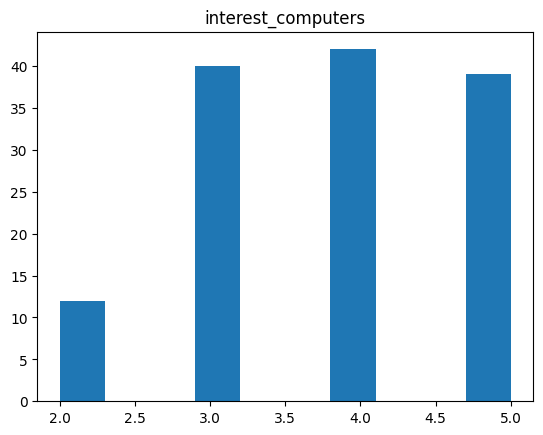

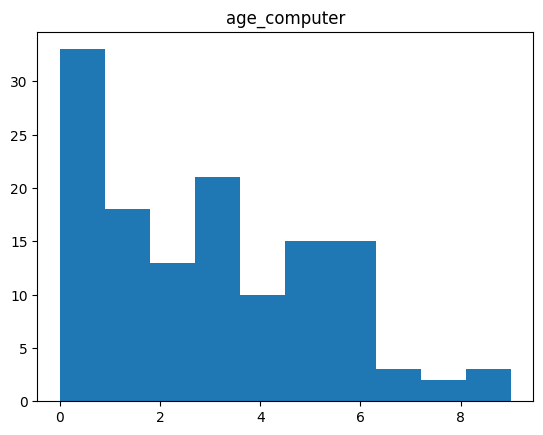

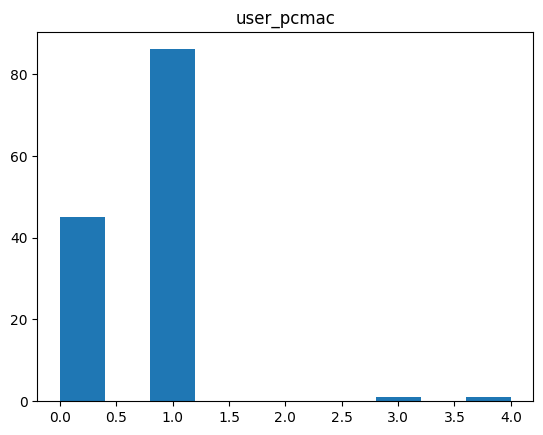

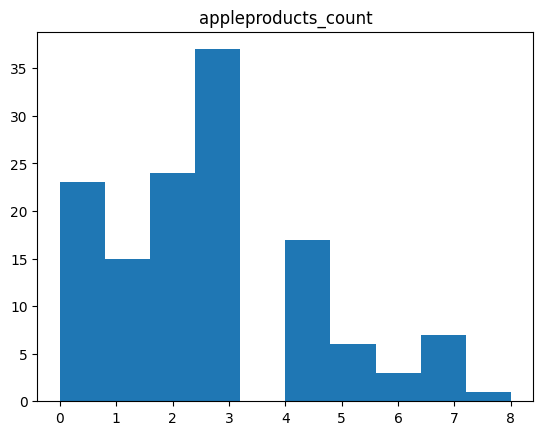

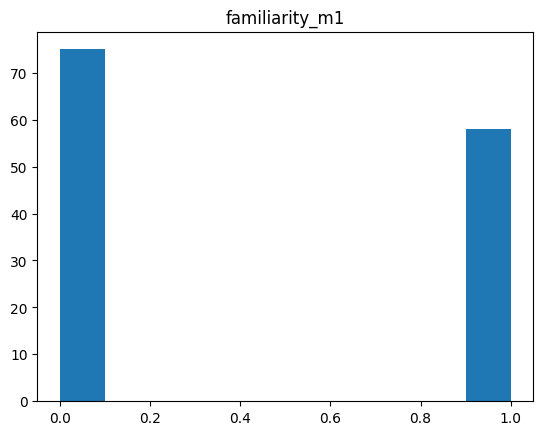

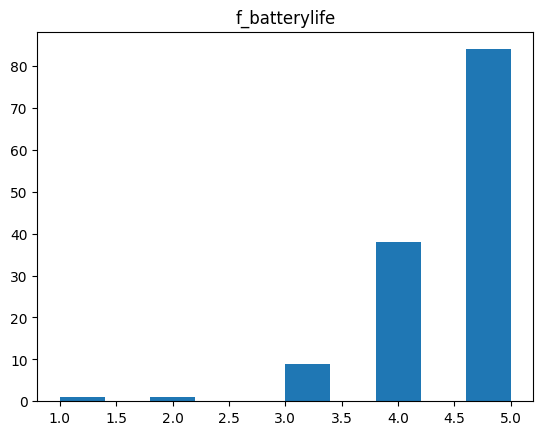

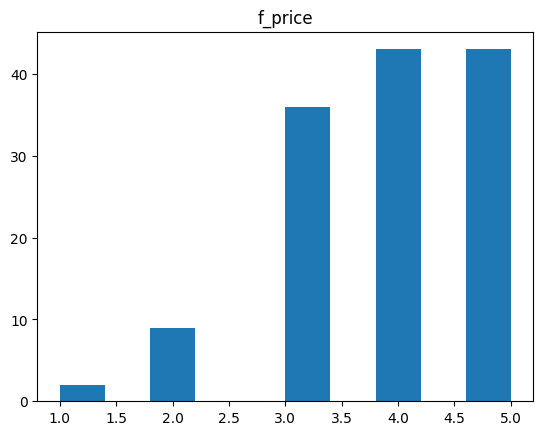

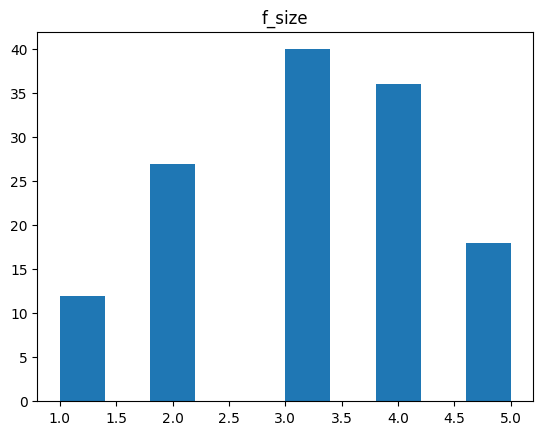

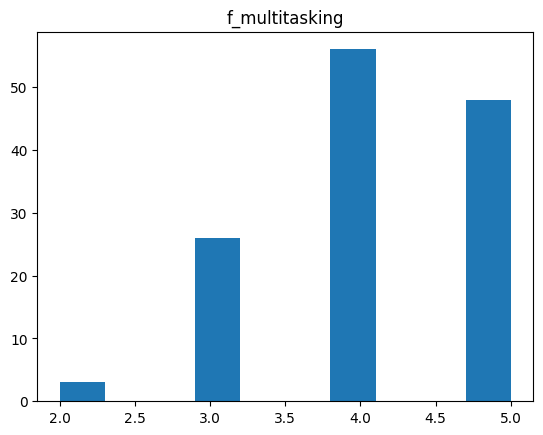

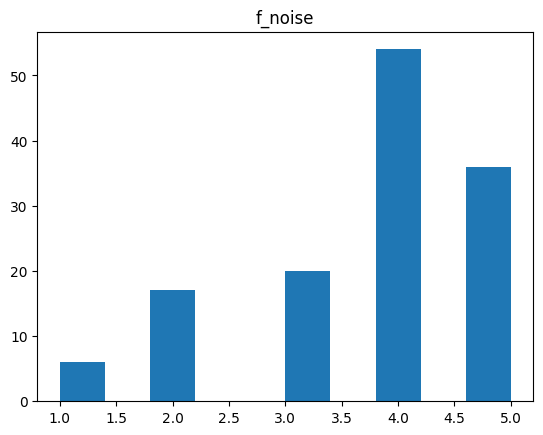

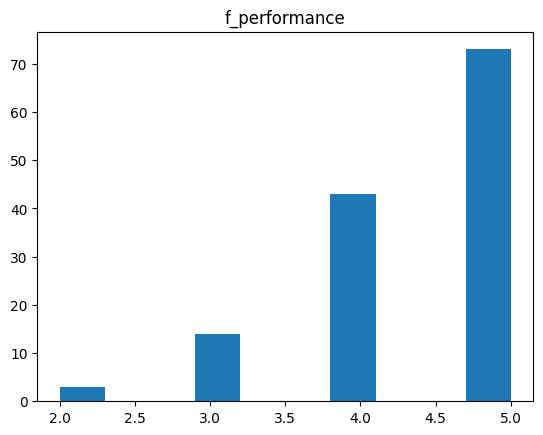

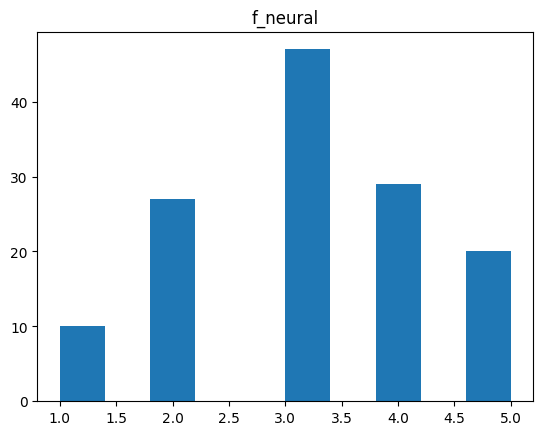

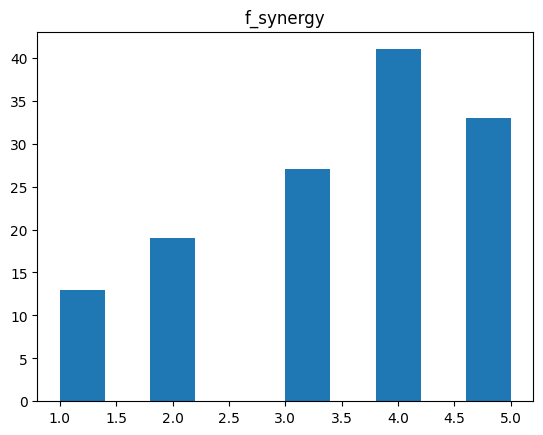

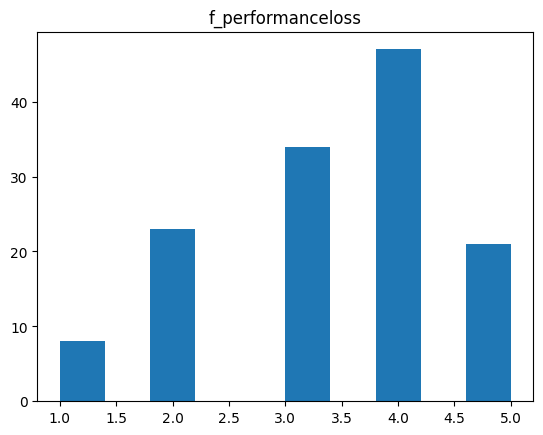

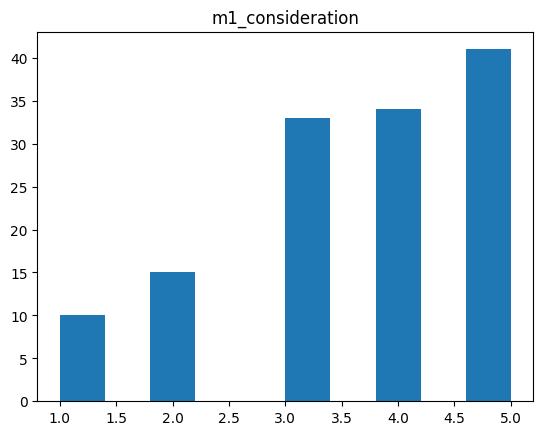

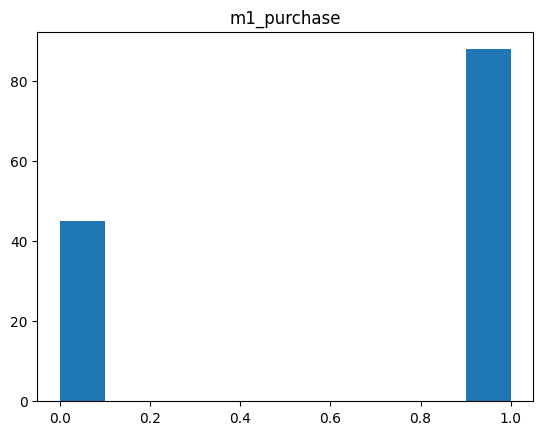

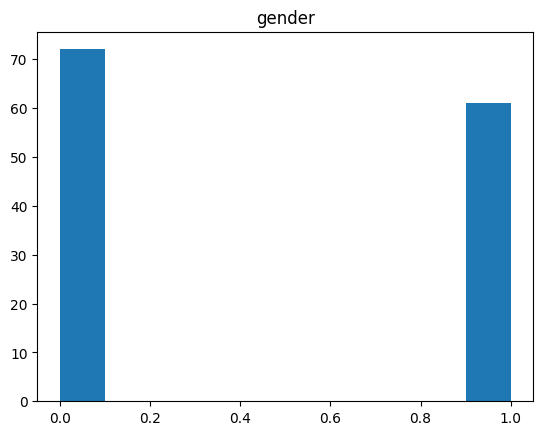

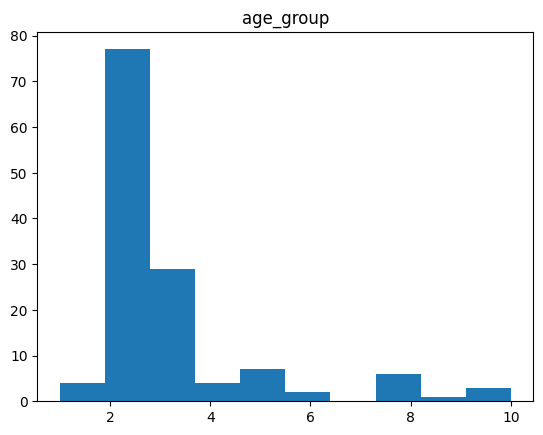

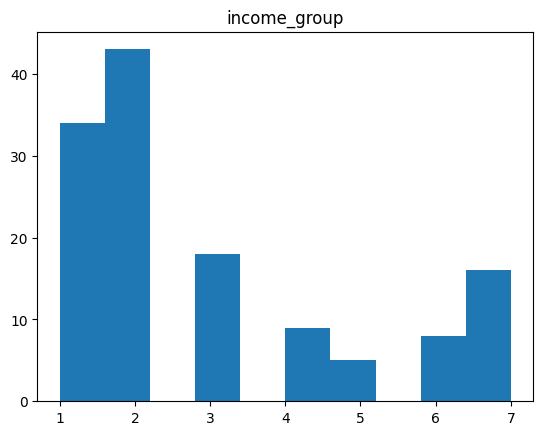

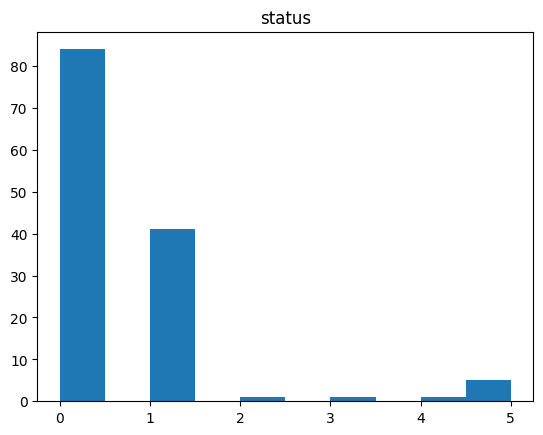

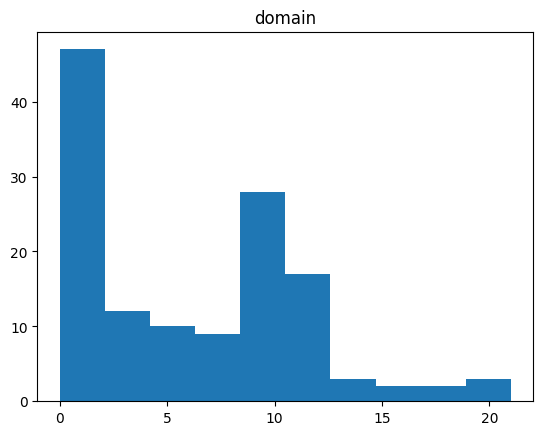

In [14]:
import matplotlib.pyplot as plt
for col in X.columns:
    plt.hist(X[col])
    plt.title(col)
    plt.show()

<Axes: >

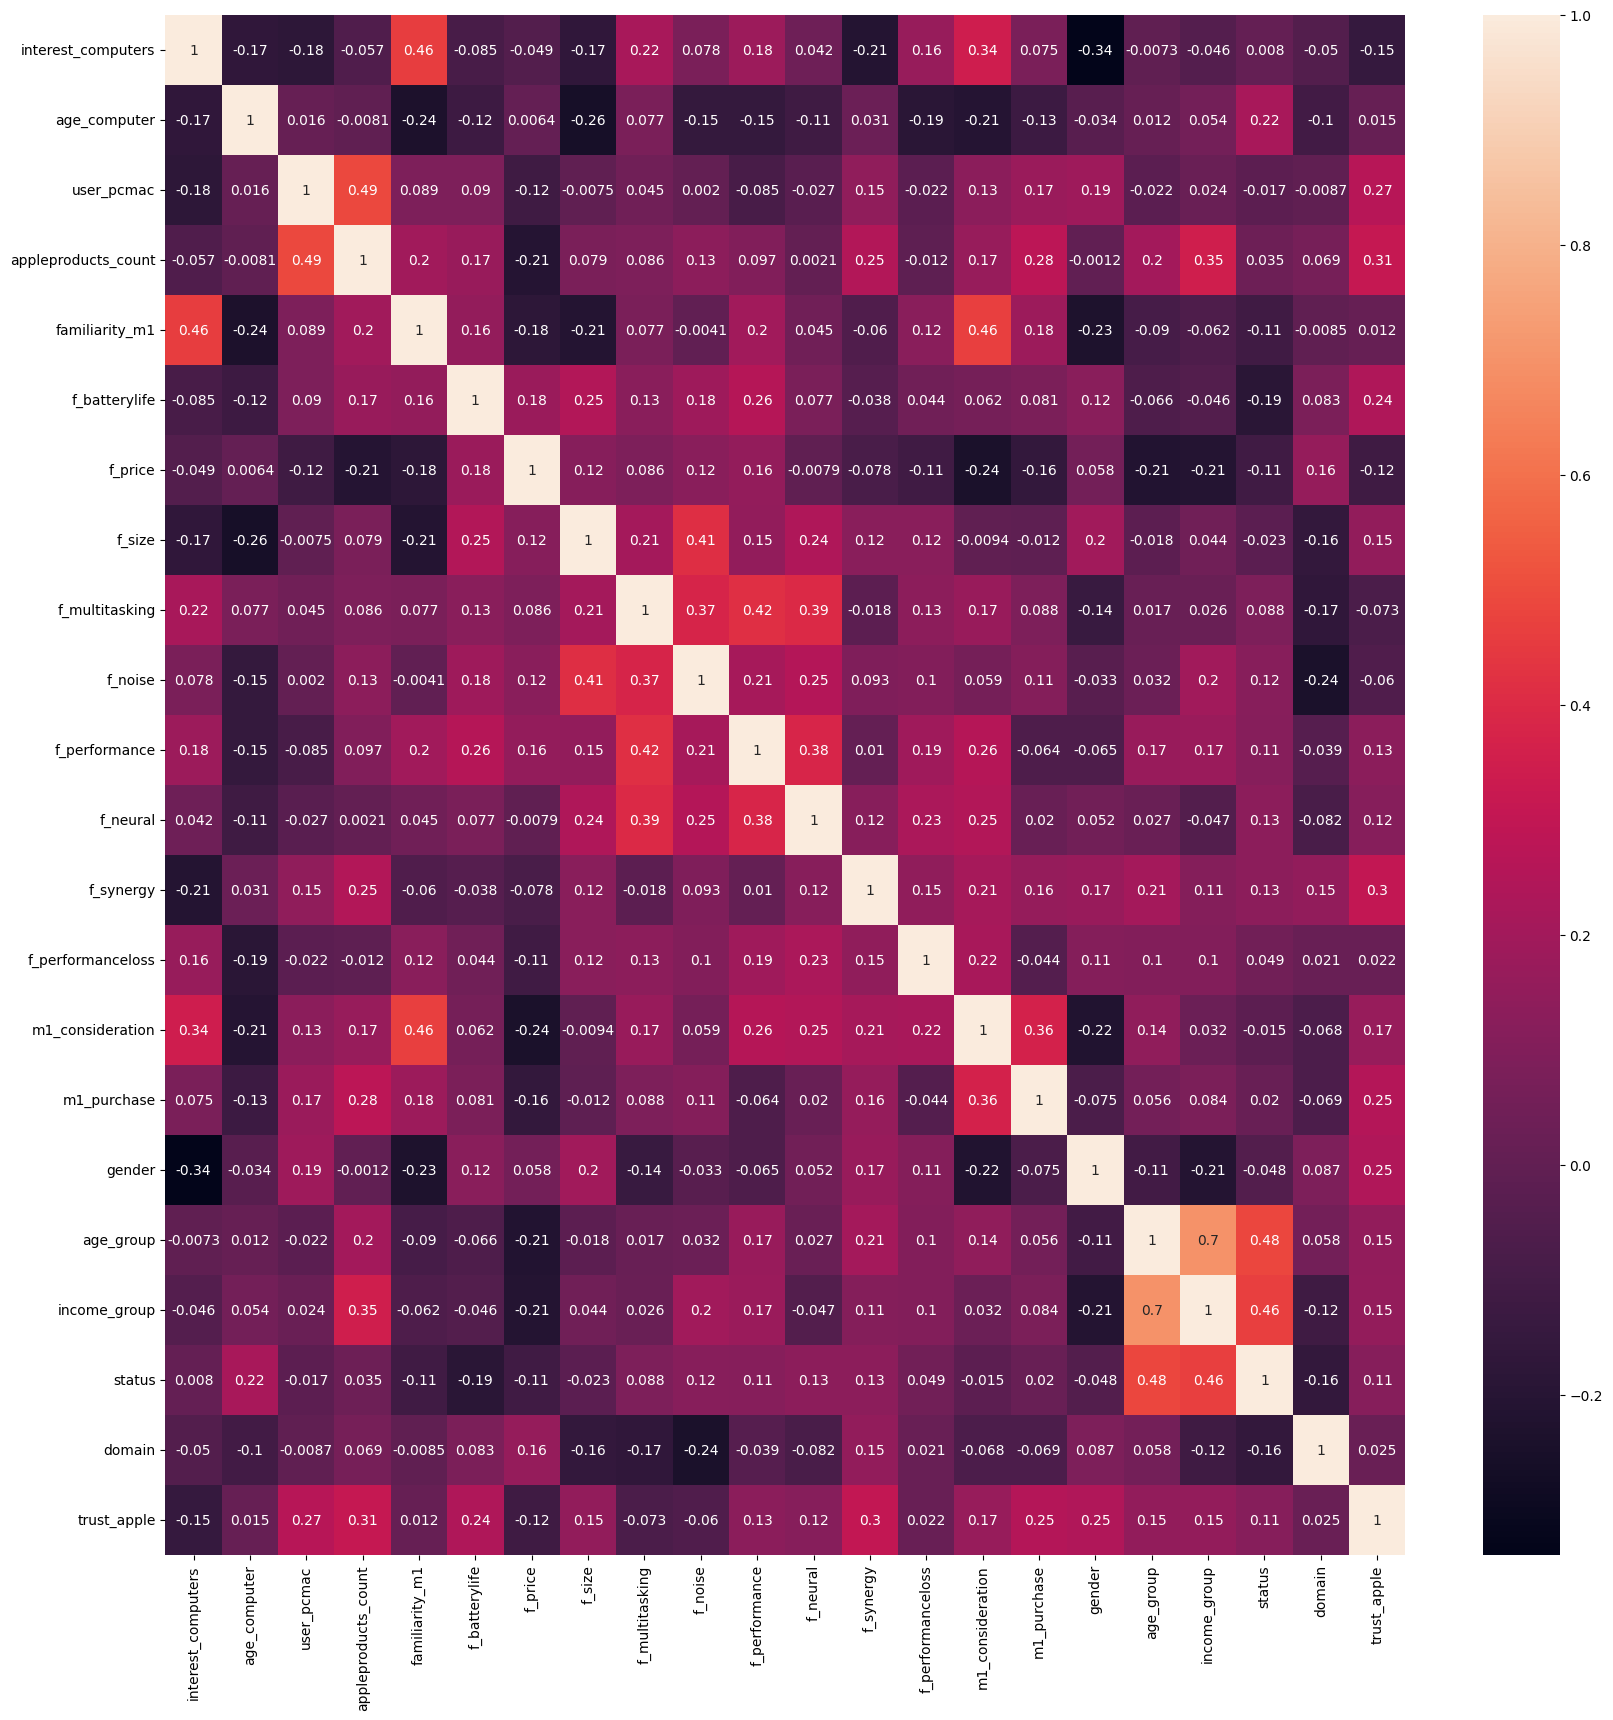

In [27]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(ndf.corr(), annot=True)

